In [1]:
%%time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn import *

import warnings
warnings.filterwarnings('ignore')

CPU times: total: 4.56 s
Wall time: 11.2 s


In [2]:
heart_df = pd.read_csv('heart.csv')
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


#### Split data into Test and Train Class

In [3]:
%%time
X = heart_df.drop(['target'], axis=1)
y = heart_df['target']

CPU times: total: 0 ns
Wall time: 8.34 ms


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

In [5]:
print('Shape of X Train: ',X_train.shape) ## 211 --> Columns, 13 --> rows
print('Shape of X Test: ' ,X_test.shape)
print('Shape of y Train: ',y_train.shape) 
print('Shape of y Test: ' ,y_test.shape)

Shape of X Train:  (717, 13)
Shape of X Test:  (308, 13)
Shape of y Train:  (717,)
Shape of y Test:  (308,)


#### 1. KNN Algorithm

In [6]:
knn_scores  = []
for k in range(2,21):
    knn_clssifier = KNeighborsClassifier(n_neighbors = k)
    knn_clssifier.fit(X_train.values, y_train.values)
    knn_score = round(knn_clssifier.score(X_test.values, y_test.values), 2)
    knn_scores.append(knn_score)
    
knn_clssifier = KNeighborsClassifier(n_neighbors=2)
knn_clssifier.fit(X_train, y_train)
knn_score = knn_clssifier.predict(X_test)
print(classification_report(y_test, knn_score))

              precision    recall  f1-score   support

           0       0.86      1.00      0.93       145
           1       1.00      0.86      0.92       163

    accuracy                           0.93       308
   macro avg       0.93      0.93      0.93       308
weighted avg       0.94      0.93      0.93       308



#### Try Different k neighbors values and check which gives more accuracy and precision rate

Text(0.5, 1.0, 'KNN Scores for different k neighbors')

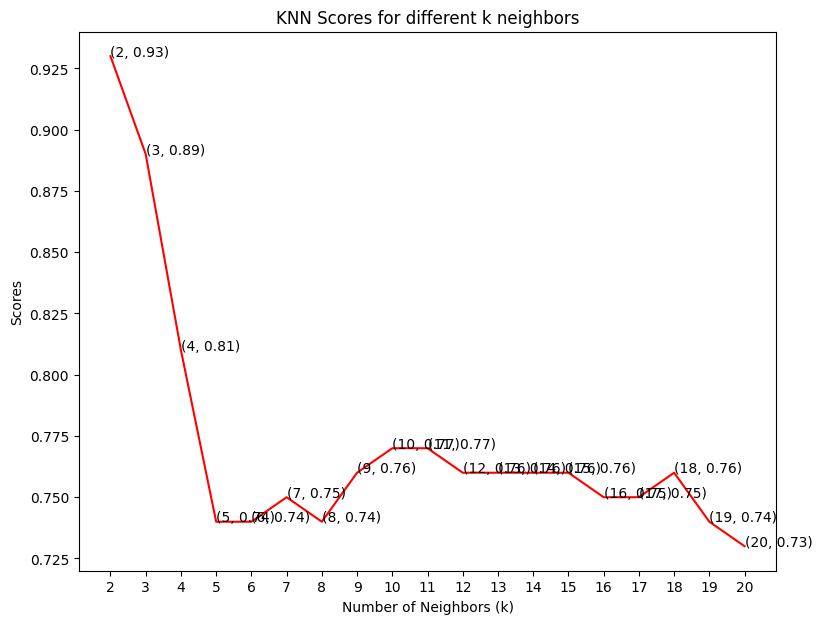

In [7]:
plt.figure(figsize=(9,7))
plt.plot([k for k in range(2,21)], knn_scores, color = 'red')
for i in range(2,21):
    plt.text(i, knn_scores[i-2],(i, knn_scores[i-2]))
plt.xticks([i for i in range(2,21)])
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Scores')
plt.title('KNN Scores for different k neighbors')

In [8]:
y_pred_knn = knn_clssifier.predict(X_train)
print('Accuracy Score ')
print(accuracy_score(y_train, y_pred_knn), '\n')
dtc_con = confusion_matrix(y_train, y_pred_knn)
print("Confusion Matrix")
print(pd.DataFrame(dtc_con, columns = ["No", "Yes"], index = ["No", "Yes"]), '\n')
print('Precision Score')
print(precision_score(y_train, y_pred_knn))
    

Accuracy Score 
0.9860529986052998 

Confusion Matrix
      No  Yes
No   354    0
Yes   10  353 

Precision Score
1.0


#### When the k_neighbors value is 1 I get Accuracy 0.9970 and precision Score - 1.0

#### 2. Logistic Regression

In [9]:
logistic_model = LogisticRegression(random_state=0)
logistic_model.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [10]:
log_y_pred = logistic_model.predict(X_train)
print('Accuracy Score ')
print(accuracy_score(y_train, log_y_pred), '\n')
dtc_con = confusion_matrix(y_train, log_y_pred)
print("Confusion Matrix")
print(pd.DataFrame(dtc_con, columns = ["No", "Yes"], index = ["No", "Yes"]), '\n')
print('Precision Score')
print(precision_score(y_train, log_y_pred))

Accuracy Score 
0.8465829846582985 

Confusion Matrix
      No  Yes
No   284   70
Yes   40  323 

Precision Score
0.821882951653944


In [11]:
svm_model = SVC(C = 1, kernel='sigmoid', gamma=1.0)

In [12]:
svm_model.fit(X_train, y_train)

SVC(C=1, gamma=1.0, kernel='sigmoid')

In [13]:
svm_y_pred = svm_model.predict(X_train)
print('Accuracy Score ')
print(accuracy_score(y_train, svm_y_pred), '\n')
dtc_con = confusion_matrix(y_train, svm_y_pred)
print("Confusion Matrix")
print(pd.DataFrame(dtc_con, columns = ["No", "Yes"], index = ["No", "Yes"]), '\n')
print('Precision Score')
print(precision_score(y_train, svm_y_pred))

Accuracy Score 
0.5062761506276151 

Confusion Matrix
     No  Yes
No    0  354
Yes   0  363 

Precision Score
0.5062761506276151


#### Try different Kernels and check accuracy, precision and confusion matrix 

In [14]:
svc_score = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in range(len(kernels)):
    svc_classifier = SVC(kernel=kernels[i])
    svc_classifier.fit(X_train.values, y_train.values)
    svc_score.append(round(svc_classifier.score(X_test.values, y_test.values), 2))

svc_classifier = SVC(kernel=kernels[1])
svc_classifier.fit(X_train.values, y_train.values)
svc_pred = svc_classifier.predict(X_train.values)

In [15]:
print('Accuracy Score ')
print(accuracy_score(y_train, svc_pred), '\n')
dtc_con = confusion_matrix(y_train, svc_pred)
print("Confusion Matrix")
print(pd.DataFrame(dtc_con, columns = ["No", "Yes"], index = ["No", "Yes"]), '\n')
print('Precision Score')
print(precision_score(y_train, svc_pred))


Accuracy Score 
0.691771269177127 

Confusion Matrix
      No  Yes
No   239  115
Yes  106  257 

Precision Score
0.6908602150537635


#### linear --> 0.8538, 0.8206
#### poly --> 0.7337, 0.7547
#### rbf --> 0.75, 0.75
#### sigmoid --> 0.5681, 0.5903

## Plot graph for it 

In [16]:
svc_score

[0.85, 0.73, 0.75, 0.57]

Text(0.5, 1.0, 'SVC Accuracy Based on Kernels')

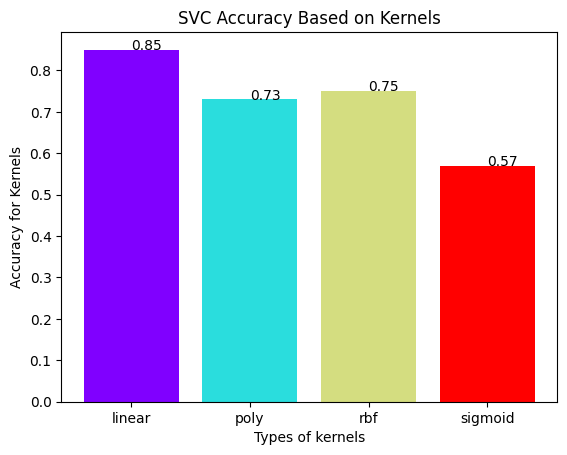

In [65]:
colors = plt.cm.rainbow(np.linspace(0,1, len(estimators)))
plt.bar(kernels, svc_score, color=colors, width=0.8)
for i in range(len(kernels)):
    plt.text(i, svc_score[i], svc_score[i])
plt.xlabel('Types of kernels')
plt.ylabel('Accuracy for Kernels')
plt.title('SVC Accuracy Based on Kernels')

## 4. Decision Tree

In [18]:
dTree_score = []
for i in range(1,len(X.columns) +1):
    
    dt_classifier = DecisionTreeClassifier(max_depth=5, max_features=i, random_state=0)
    dt_classifier.fit(X_train, y_train)
    dTree_score.append(round(dt_classifier.score(X_test.values, y_test.values), 2))
print(dTree_score)

[0.8, 0.83, 0.87, 0.89, 0.88, 0.87, 0.88, 0.88, 0.92, 0.9, 0.89, 0.92, 0.91]


In [19]:
dTree_classifier = DecisionTreeClassifier(max_features=12
                                          , max_depth=5, random_state=0)
dTree_classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, max_features=12, random_state=0)

In [20]:
dt_y_pred = dTree_classifier.predict(X_train)
print('Accuracy Score ')
print(accuracy_score(y_train, dt_y_pred), '\n')
dtc_con = confusion_matrix(y_train, dt_y_pred)
print("Confusion Matrix")
print(pd.DataFrame(dtc_con, columns = ["No", "Yes"], index = ["No", "Yes"]), '\n')
print('Precision Score')
print(precision_score(y_train, dt_y_pred))


Accuracy Score 
0.9358437935843794 

Confusion Matrix
      No  Yes
No   317   37
Yes    9  354 

Precision Score
0.9053708439897699


Text(0.5, 1.0, 'Decision Tree Classifier Scores for different number of maximum feature')

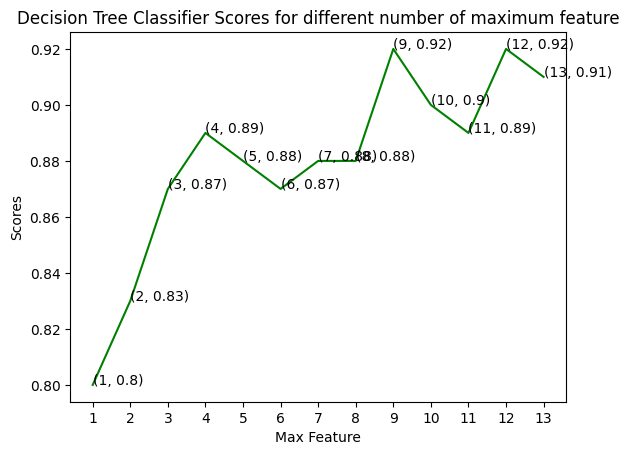

In [21]:
plt.plot([i for i in range(1, len(X.columns) +1)], dTree_score, color='g')
for i in range(1,len(X.columns) +1):
    plt.text(i, dTree_score[i-1], (i, dTree_score[i-1]))
plt.xticks([i for i in range(1, len(X.columns)+1)])
plt.xlabel('Max Feature')
plt.ylabel('Scores')
plt.title('Decision Tree Classifier Scores for different number of maximum feature')

## 5. Random Forest

Text(0.5, 1.0, 'Random Forest Classifier Scores for different number of estimators')

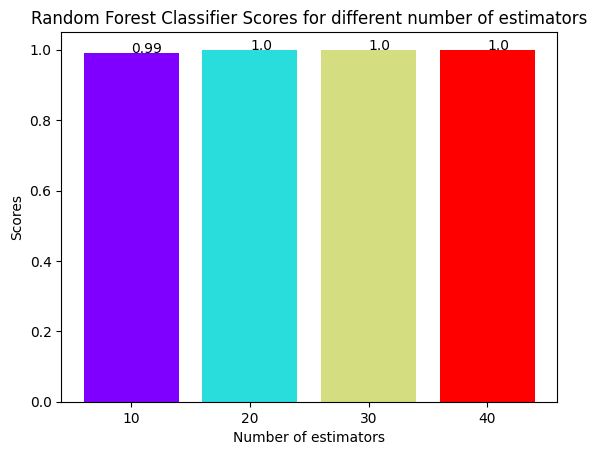

In [62]:
RF_score = []
estimators = [n for n in range(10,50,10)]

for i in estimators:
    rf_classifier = RandomForestClassifier(n_estimators=i, random_state=0)
    rf_classifier.fit(X_train, y_train)
    RF_score.append(round(rf_classifier.score(X_test, y_test),2))

colors = plt.cm.rainbow(np.linspace(0,1, len(estimators)))
plt.bar([i for i in range(len(estimators))], RF_score, color= colors, width=0.8)
for i in range(len(estimators)):
    plt.text(i, RF_score[i], RF_score[i])
plt.xticks(ticks=[i for i in range(len(estimators))], labels=[str(estimator) for estimator in estimators])
plt.xlabel('Number of estimators')
plt.ylabel('Scores')
plt.title('Random Forest Classifier Scores for different number of estimators')

In [63]:
rf_class2 = RandomForestClassifier(n_estimators=10, random_state=0)
rf_class2.fit(X_train, y_train)
rf_y_pred = rf_class2.predict(X_test)

In [64]:
print('Accuracy Score ')
print(accuracy_score(y_test, rf_y_pred), '\n')
dtc_con = confusion_matrix(y_test, rf_y_pred)
print("Confusion Matrix")
print(pd.DataFrame(dtc_con, columns = ["No", "Yes"], index = ["No", "Yes"]), '\n')
print('Precision Score')
print(precision_score(y_test, rf_y_pred))


Accuracy Score 
0.9902597402597403 

Confusion Matrix
      No  Yes
No   145    0
Yes    3  160 

Precision Score
1.0
